**Implementing Titanic Solution using LOGISTIC REGRESSION**

accuracy = 0.83

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_init = pd.read_csv('../input/train.csv') # read the train data in data DataFrame
test_data = pd.read_csv('../input/test.csv') #read the test data
sol = pd.read_csv('../input/gender_submission.csv') #read the solutions
test_data['Survived']=sol['Survived'] #adding the solution to the test set 

In [3]:
data=(data_init.append(test_data)) #it is formed by appending the test and train data 
data.head()  #Reading the data to check the header


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [4]:
data.describe() #used to check if there are missing values

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.377387
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.484918
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [5]:
#fill the NaN value
data['Age'].fillna(data['Age'].median(),inplace=True)
data.Cabin.fillna('U',inplace=True)
data.Embarked.fillna('S',inplace=True)
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Age.fillna(data.Age.median(), inplace=True)

**VISUALISING THE DATA**

**1. Sex versus Survival**

          female  male
Total        466   843
Survived     385   109
Died          81   734


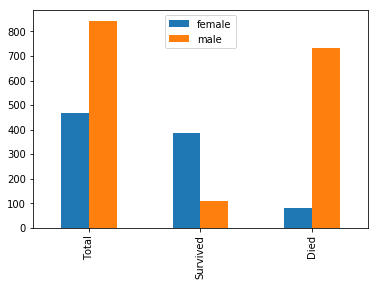

In [6]:
total = data['Sex'].value_counts()
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([total,survived_sex,died_sex])
df.index = ['Total','Survived','Died']
print(df)
df.plot(kind='bar')

**2. Age vs Survival**

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


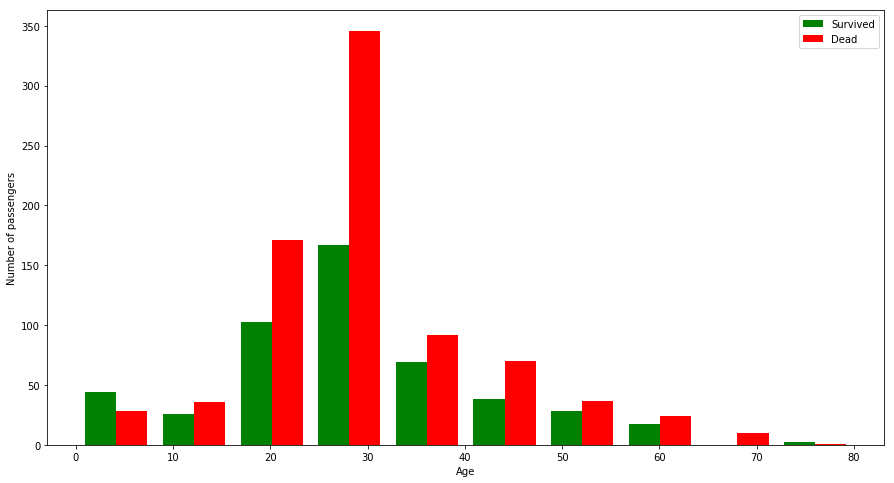

In [7]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

**3. Class versus Survival**

             0    1  total
1st class  137  186    323
2nd class  160  117    277
3rd class  518  191    709


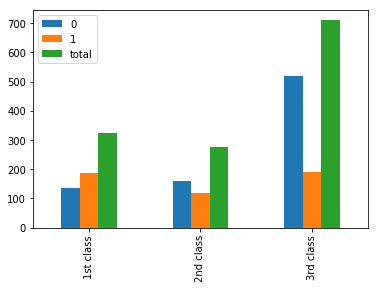

In [8]:
survived_1 = data[data['Pclass']==1]['Survived'].value_counts()
survived_2 = data[data['Pclass']==2]['Survived'].value_counts()
survived_3 = data[data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

**4. Fare versus Survival**

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


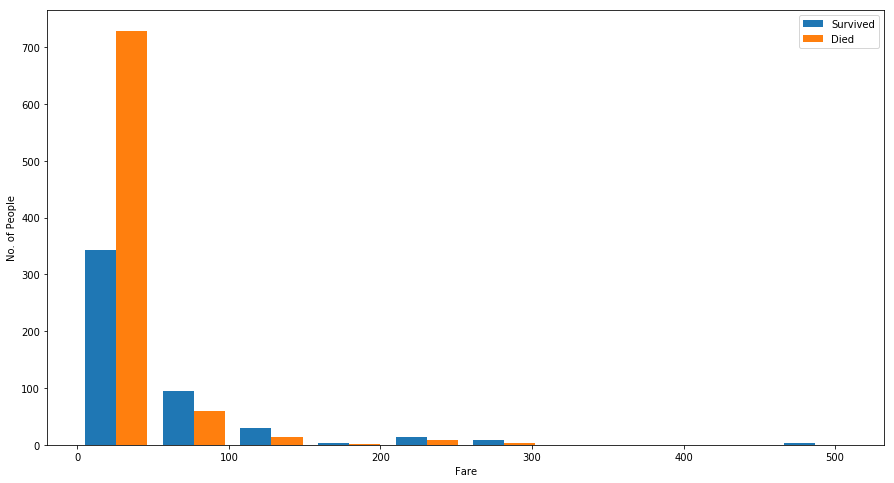

In [9]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

**5. Fare and Age versus Survival **

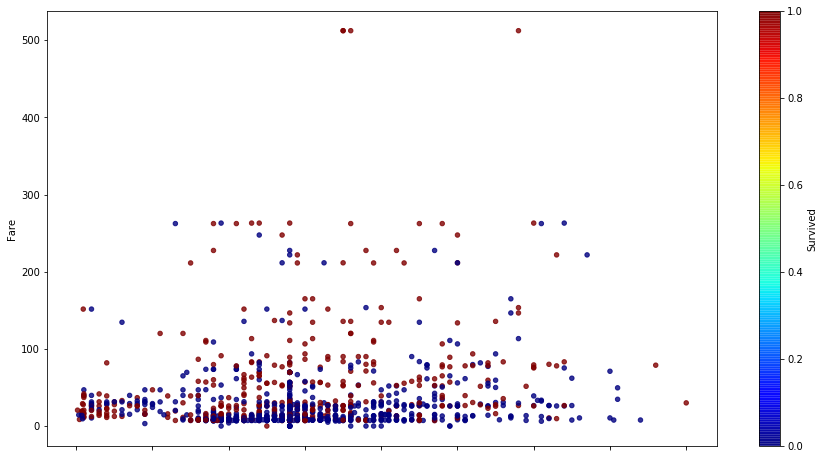

In [10]:
#Age versus Fare
data.plot.scatter('Age','Fare',c='Survived',colormap='jet',alpha=0.8,figsize=(15,8))

**6. Embarkment versus Survival**

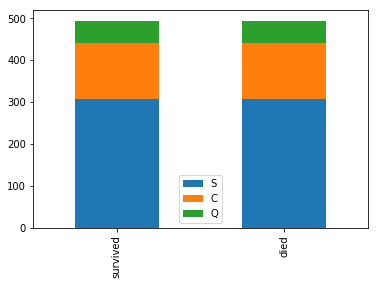

In [11]:
survived_embarkment  = data[data['Survived']==1]['Embarked'].value_counts()
died_embarkment = data[data['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

**Encoding the value for Logistic Regression**

 One Hot Encoding for using the logistic reg. 
 
 For more reading [this link](http://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

In [12]:
data_set = data[['Pclass','Sex','Age','Fare','SibSp','Cabin']]
one_hot_encoded_training_predictors = pd.get_dummies(data_set)
one_hot_encoded_training_predictors.head()
X = one_hot_encoded_training_predictors
y = data['Survived']

In [13]:
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=1)
logreg = LogisticRegression() #logistic regression using python
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = logreg.predict(X_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83
